In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import math
from statistics import stdev
from scipy import stats
import scipy.stats as ss
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
import statsmodels.stats.api as sm

In [2]:
sur = pd.read_csv('E:\GL\Course Content\Statistical Methods for Decision Making\Jupyter Notebooks\SMDM Project\Survey.csv')

In [3]:
sur.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [4]:
sur.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

## 2.1.1. Gender and Major

In [5]:
pd.crosstab(sur['Gender'],sur['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


## 2.1.2. Gender and Grad Intention

In [6]:
pd.crosstab(sur['Gender'],sur['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


## 2.1.3. Gender and Employment

In [7]:
pd.crosstab(sur['Gender'],sur['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


## 2.1.4. Gender and Computer

In [8]:
pd.crosstab(sur['Gender'],sur['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:


## 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [9]:
sur['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [10]:
sur['Gender'].value_counts().sum()

62

In [11]:
Total_Gender= 62
Total_Male = 29
Prob_Male = (Total_Male/Total_Gender)*100
print('Probability of Male is %.2f' % Prob_Male + '%')

Probability of Male is 46.77%


## 2.2.2 What is the probability that a randomly selected CMSU student will be female?


In [12]:
Total_Gender= 62
Total_Female = 33
Prob_Female = (Total_Female/Total_Gender)*100
print('Probability of Female is %.2f' % Prob_Female + '%')

Probability of Female is 53.23%


## 2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [13]:
pd.crosstab(sur['Gender'],sur['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [14]:
Total_Accounting_Male = 4
Total_Male = 29
Prob_Accounting_Male = (Total_Accounting_Male/Total_Male)*100
print('Probability of Male opting for Accounting Major is %.2f' % Prob_Accounting_Male + '%')

Probability of Male opting for Accounting Major is 13.79%


In [15]:
Total_CIS_Male = 1
Total_Male = 25
Prob_CIS_Male = (Total_CIS_Male/Total_Male)*100
print('Probability of Male opting for CIS Major is %.2f' % Prob_CIS_Male + '%')

Probability of Male opting for CIS Major is 4.00%


In [16]:
Total_EcoFin_Male = 4
Total_Male = 24
Prob_EcoFin_Male = (Total_EcoFin_Male/Total_Male)*100
print('Probability of Male opting for Economic/Finance Major is %.2f' % Prob_EcoFin_Male + '%')

Probability of Male opting for Economic/Finance Major is 16.67%


In [17]:
Total_IB_Male = 2
Total_Male = 20
Prob_IB_Male = (Total_IB_Male/Total_Male)*100
print('Probability of Male opting for International Business Major is %.2f' % Prob_IB_Male + '%')

Probability of Male opting for International Business Major is 10.00%


In [18]:
Total_Mngt_Male = 6
Total_Male = 18
Prob_Mngt_Male = (Total_Mngt_Male/Total_Male)*100
print('Probability of Male opting for Management Major is %.2f' % Prob_Mngt_Male + '%')

Probability of Male opting for Management Major is 33.33%


In [19]:
Total_Other_Male = 4
Total_Male = 12
Prob_Other_Male = (Total_Other_Male/Total_Male)*100
print('Probability of Male opting for Other Major is %.2f' % Prob_Other_Male + '%')

Probability of Male opting for Other Major is 33.33%


In [20]:
Total_RetMar_Male = 5
Total_Male = 8
Prob_RetMar_Male = (Total_RetMar_Male/Total_Male)*100
print('Probability of Male opting for Retailing/Marketing Major is %.2f' % Prob_RetMar_Male + '%')

Probability of Male opting for Retailing/Marketing Major is 62.50%


In [21]:
Total_UD_Male = 3
Total_Male = 3
Prob_UD_Male = (Total_UD_Male/Total_Male)*100
print('Probability of Male opting for Undecided Major is %.2f' % Prob_UD_Male + '%')

Probability of Male opting for Undecided Major is 100.00%


## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [22]:
pd.crosstab(sur['Gender'],sur['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [23]:
Total_Accounting_Female = 3
Total_Female = 33
Prob_Accounting_Female = (Total_Accounting_Female/Total_Female)*100
print('Probability of Female opting for Accounting Major is %.2f' % Prob_Accounting_Female + '%')

Probability of Female opting for Accounting Major is 9.09%


In [24]:
Total_CIS_Female = 3
Total_Female = 30
Prob_CIS_Female = (Total_CIS_Female/Total_Female)*100
print('Probability of Female opting for CIS Major is %.2f' % Prob_CIS_Female + '%')

Probability of Female opting for CIS Major is 10.00%


In [25]:
Total_EcoFin_Female = 7
Total_Female = 27
Prob_EcoFin_Female = (Total_EcoFin_Female/Total_Female)*100
print('Probability of Female opting for Economic/Finance Major is %.2f' % Prob_EcoFin_Female + '%')

Probability of Female opting for Economic/Finance Major is 25.93%


In [26]:
Total_IB_Female = 4
Total_Female = 20
Prob_IB_Female = (Total_IB_Female/Total_Female)*100
print('Probability of Female opting for International Business Major is %.2f' % Prob_IB_Female + '%')

Probability of Female opting for International Business Major is 20.00%


In [27]:
Total_Mngt_Female = 4
Total_Female = 16
Prob_Mngt_Female = (Total_Mngt_Female/Total_Female)*100
print('Probability of Female opting for Management Major is %.2f' % Prob_Mngt_Female + '%')

Probability of Female opting for Management Major is 25.00%


In [13]:
Total_Other_Female = 3
Total_Female = 12
Prob_Other_Female = (Total_Other_Female/Total_Female)*100
print('Probability of Female opting for Other Major is %.2f' % Prob_Other_Female + '%')

Probability of Female opting for Other Major is 25.00%


In [14]:
Total_RetMar_Female = 9
Total_Female = 9
Prob_RetMar_Female = (Total_RetMar_Female/Total_Female)*100
print('Probability of Female opting for Retailing/Marketing Major is %.2f' % Prob_RetMar_Female + '%')

Probability of Female opting for Retailing/Marketing Major is 100.00%


In [15]:
Total_UD_Female = 0
Total_Female = 1
Prob_UD_Female = (Total_UD_Female/Total_Female)*100
print('Probability of Female opting for Undecided Major is %.2f' % Prob_UD_Female + '%')

Probability of Female opting for Undecided Major is 0.00%


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.


In [29]:
Prob_Male = 29/62
Prob_Total_Graduating = 28/62 # 17 boys and 11 girls
Prob_Male_Graduating = 17/62 
Prob_Male_Intends_Graduate =(round(Prob_Male+Prob_Total_Graduating-Prob_Male_Graduating,4))*100
print('Probability of randomly chosen student is a male and intends to graduate is %.2f' % Prob_Male_Intends_Graduate + '%')

Probability of randomly chosen student is a male and intends to graduate is 64.52%


## 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [30]:
Prob_Female = 33/62
Prob_Total_No_Laptop = 7/62 # 43 boys and girls in total have laptops.
Prob_Females_No_Laptop = 4/62 
Prob_Random_Female_No_Laptop =(round(Prob_Female+Prob_Total_No_Laptop-Prob_Females_No_Laptop,4))*100
print('Probability of randomly selected student is a female and does NOT have a laptop is %.2f' % Prob_Random_Female_No_Laptop + '%')

Probability of randomly selected student is a female and does NOT have a laptop is 58.06%


## 2.5.1 Find the probability that a randomly chosen student is either a male or has a full-time employment


In [31]:
Prob_Male = 29/62
Prob_Total_FT_Employement = 10/62 # 7 boys and 3 girls
Prob_Male_FT_Employement = 7/62 
Prob_Random_Male_FT_Employement =(round(Prob_Male+Prob_Total_FT_Employement-Prob_Male_FT_Employement,4))*100
print('Probability of randomly chosen student is either a male or has a full-time employment is %.2f' % Prob_Random_Male_FT_Employement + '%')

Probability of randomly chosen student is either a male or has a full-time employment is 51.61%


## 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [32]:
Prob_IB_Female = 4/33
Prob_Mngt_Female = 4/29
Prob_Female_IB_or_Mngt =(round(Prob_IB_Female+Prob_Mngt_Female,4))*100
print('Conditional probability that given a female student is randomly chosen, she is majoring in international business or management is %.2f' % Prob_Female_IB_or_Mngt + '%')

Conditional probability that given a female student is randomly chosen, she is majoring in international business or management is 25.91%


## 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

The answer to this is No, they are not independent events as irrespective of the choice of graduating or not. The gender would be placed in the contingency table according to where it fits. This is because the total probability of the parameter has to always be 100%. In order for this. when considering the probability of graduate intention, both male and female probabilities would need to be taken into consideration. 

## 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

## 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [33]:
pd.crosstab(sur['Gender'],sur['GPA'])

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [34]:
Prob_GPA_1 = 1/62 # for GPA 2.3
Prob_GPA_2 = 1/61 # for GPA 2.4
Prob_GPA_3 = 6/60 # for GPA 2.5
Prob_GPA_4 = 2/54 # for GPA 2.6
Prob_GPA_5 = 3/52 # for GPA 2.8
Prob_GPA_6 = 4/49 # for GPA 2.9

Prob_GPA_Less_than_3 = round(Prob_GPA_1+Prob_GPA_2+Prob_GPA_3+Prob_GPA_4+Prob_GPA_5+Prob_GPA_6,4)*100
print('Probability of student is chosen randomly, what is the probability that his/her GPA is less than 3 is %.2f' % Prob_GPA_Less_than_3 + '%')

Probability of student is chosen randomly, what is the probability that his/her GPA is less than 3 is 30.89%


## 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [35]:
pd.crosstab(sur['Gender'],sur['Salary'])

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [36]:
Prob_Sal_50 = 4/29 
Prob_Sal_52 = 1/25 
Prob_Sal_54 = 1/24 
Prob_Sal_55 = 3/23 
Prob_Sal_60 = 3/20 
Prob_Sal_65 = 1/17 
Prob_Sal_70 = 0/16 
Prob_Sal_78 = 0/16 
Prob_Sal_80 = 1/16

Prob_Male_Sal_50_or_More = round(Prob_Sal_50+ Prob_Sal_52 + Prob_Sal_54 + Prob_Sal_55 + Prob_Sal_60 + Prob_Sal_65 + Prob_Sal_70 + Prob_Sal_78 + Prob_Sal_80, 4)*100
print('Conditional probability that a randomly selected male earns 50 or more is %.2f' % Prob_Male_Sal_50_or_More + '%')

Conditional probability that a randomly selected male earns 50 or more is 62.14%


In [37]:
Prob_Fem_Sal_50 = 0/33 
Prob_Fem_Sal_52 = 1/33 
Prob_Fem_Sal_54 = 1/32 
Prob_Fem_Sal_55 = 3/31 
Prob_Fem_Sal_60 = 3/28 
Prob_Fem_Sal_65 = 1/25 
Prob_Fem_Sal_70 = 0/24 
Prob_Fem_Sal_78 = 0/24 
Prob_Fem_Sal_80 = 1/24

Prob_Female_Sal_50_or_More = round(Prob_Fem_Sal_50+ Prob_Fem_Sal_52 + Prob_Fem_Sal_54 + Prob_Fem_Sal_55 + Prob_Fem_Sal_60 + Prob_Fem_Sal_65 + Prob_Fem_Sal_70 + Prob_Fem_Sal_78 + Prob_Fem_Sal_80, 4)*100
print('Conditional probability that a randomly selected female earns 50 or more is %.2f' % Prob_Female_Sal_50_or_More + '%')

Conditional probability that a randomly selected female earns 50 or more is 34.71%


## 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'GPA'}>],
       [<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Social Networking'}>,
        <AxesSubplot:title={'center':'Satisfaction'}>],
       [<AxesSubplot:title={'center':'Spending'}>,
        <AxesSubplot:title={'center':'Text Messages'}>, <AxesSubplot:>]],
      dtype=object)

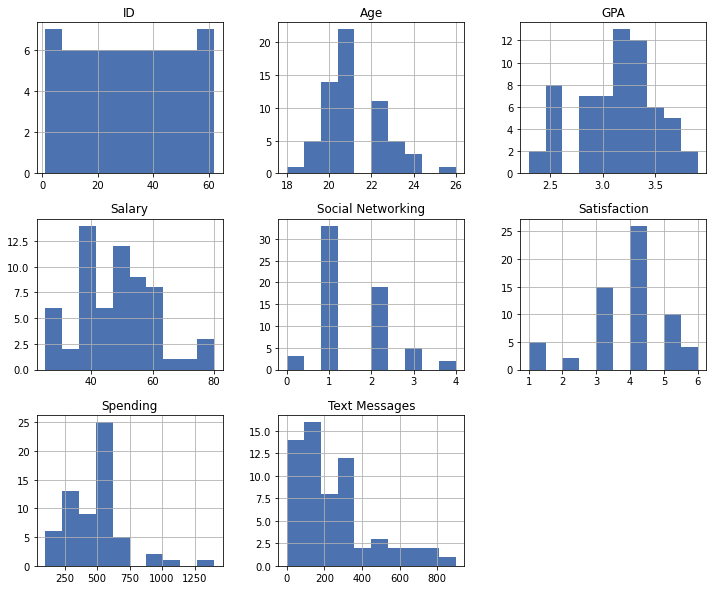

In [38]:
sur.hist(figsize=(12,10))

No they do not follow normal distribution